### Compare the transcriptional abundance and variation of 7 yeasts core genome vs S.cerevisaie core genome vs non-core genome

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy import stats

# set work dir
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database')

In [2]:
# load geneMatrix
sce1800_geneMatrix=pd.read_csv(r"data\geneMatrix\pan1800_v2_blastp_50_70_geneMatrix.csv",index_col=0)
yeasts7_geneMatrix=pd.read_csv(r"data\geneMatrix\7yeasts_nonref_blastp_50_70_geneMatrix.csv",index_col=0)

sce1800_core99=sce1800_geneMatrix[sce1800_geneMatrix.sum(axis=1)>=sce1800_geneMatrix.shape[1]*0.99].index.tolist()
yeasts7_coreList=yeasts7_geneMatrix[yeasts7_geneMatrix.sum(axis=1)==7].index.tolist()
yeasts7_coreList=[i for i in yeasts7_coreList if i in sce1800_core99]

In [3]:
# load TPM data
df_sceTPM=pd.read_csv(r"code/7.transcriptomics_ssGEMs_analysis/output/sce969_transcriptome_tpmMatrix.csv",index_col=0)
# fill na with 0
df_sceTPM=df_sceTPM.fillna(0)

# transform TPM to log2(TPM+1)
df_sceTPM_2=df_sceTPM.copy()
df_sceTPM_2=df_sceTPM_2+1
df_sceTPM_2=np.log2(df_sceTPM_2)


df_sceTPM_2
# # get dataframe of non-core genes, sce core genes, yeast7 core genes
# df_sce_noncoreTPM=df_sceTPM_2[df_sceTPM_2.index.isin(sce1800_core99)==False]
# df_sce_coreTPM=df_sceTPM_2[df_sceTPM_2.index.isin(sce1800_core99)]
# df_yeast7_coreTPM=df_sceTPM_2[df_sceTPM_2.index.isin(yeasts7_coreList)]
# df_scecore_nonyeast7TPM=df_sce_coreTPM[df_sce_coreTPM.index.isin(yeasts7_coreList)==False]


,CNF_4.re,ACS_2.re,CBA_3.re,YBK.re,CIT_3.re,ATP_4.re,BFM_3.re,AKT_4.re,BHP_4.re,YBH.re,...,ACB_6.re,BFH_3.re,CIB_4.re,XTRA_DCU,BCC_3.re,ACV_2.re,AQQ_4.re,CCL_1.re,AGV_2.re,AAQ_3.re
re3,,,,,,,,,,,,,,,,,,,,,
YNL201C,5.534702,5.630548,5.197706,5.296711,4.941296,5.083003,4.599625,4.509441,5.478467,4.587789,...,3.968454,5.116568,4.259580,4.391650,4.686265,4.987749,5.238040,5.147786,4.858712,5.252260
YGR040W,5.134178,6.089007,5.410368,5.672146,5.196266,5.472676,4.714595,4.479526,6.816293,4.717864,...,5.504107,4.094662,4.806978,4.814976,4.837977,4.881927,4.381618,5.004643,4.602094,5.857987
YKR007W,6.475776,6.817306,6.923908,6.739855,6.397733,7.091166,6.571091,6.389021,7.109855,6.228000,...,6.732065,6.787892,6.917380,6.341906,6.576400,6.773629,6.931749,6.688118,6.662084,6.867862
YDR366C,1.913938,2.943153,2.239612,4.611161,2.654722,1.846895,2.211074,1.211552,1.765531,2.206343,...,7.236994,4.101591,3.160920,0.740240,2.105477,1.950535,1.845503,4.030870,2.004482,3.428766
YMR069W,2.959244,3.268965,3.259031,3.989055,2.357821,3.401337,2.437604,2.073378,2.845878,2.731431,...,3.137071,3.169543,3.223817,1.837309,3.527796,2.890205,3.180182,3.011816,2.024412,2.541227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR178W,4.701259,4.971563,4.846619,4.932989,4.750858,4.593327,4.271294,5.359619,4.793960,4.754718,...,4.851395,4.855039,4.593354,4.911951,4.425913,5.041343,4.757367,4.824528,5.070928,5.070516
YNL215W,6.606210,7.074793,6.906545,6.311252,6.615157,6.817907,6.858629,6.799080,6.659220,6.584286,...,6.405055,7.117763,6.577158,6.801207,6.638758,7.151739,7.551742,6.897071,6.864688,7.035938
YDR456W,5.747029,5.711822,5.621568,6.052468,5.593548,5.508365,5.286048,5.136468,5.752062,5.585576,...,4.744045,6.291818,5.015893,4.934480,5.532484,5.479121,5.430693,5.678176,5.385216,5.740152


In [5]:
def evaluate_tpmMatrix(tpmMatrix):
    '''calculate the mean transcriptional leval, standard deviation, coefficient of variation and dispersion for each gene without 0 value.
    As for dispersion, it is defined as average absolute deviation from the mean.
    '''
    df_tpm_info=pd.DataFrame(columns=["mean","std","cv","dispersion"])
    tpmMatrix=tpmMatrix.astype(float)
    df_tpm_info["mean"]=tpmMatrix[tpmMatrix>0].mean(axis=1)
    df_tpm_info["std"]=tpmMatrix[tpmMatrix>0].std(axis=1)
    df_tpm_info["cv"]=df_tpm_info["std"]/df_tpm_info["mean"]
    df_tpm_info["dispersion"]=tpmMatrix[tpmMatrix>0].apply(lambda x:np.abs(x-x.mean()).mean(),axis=1)

    # fill na with mean value of each column
    df_tpm_info=df_tpm_info.fillna(df_tpm_info.mean())

    return df_tpm_info

In [8]:
df_sce_logtpm_info=evaluate_tpmMatrix(df_sceTPM_2)

df_sce_accessory_tpm_info=df_sce_logtpm_info[df_sce_logtpm_info.index.isin(sce1800_core99)==False]
df_sce_core_tpm_info=df_sce_logtpm_info[df_sce_logtpm_info.index.isin(sce1800_core99)]
df_sce_yeastcore_tpm_info=df_sce_logtpm_info[df_sce_logtpm_info.index.isin(yeasts7_coreList)]
df_sce_core_nonyeastcore_tpm_info=df_sce_core_tpm_info[df_sce_core_tpm_info.index.isin(yeasts7_coreList)==False]

In [14]:
# add type for df_sce_logtpm_info
df_sce_logtpm_info["type"]=df_sce_logtpm_info.index.map(lambda x:'yeast_core' if x in yeasts7_coreList else 'sce_core' if x in sce1800_core99 else 'accessory')

# save result
df_sce_logtpm_info.to_csv(r"code/4.pan-genome_analysis/compare_with_closed_yeasts/output/sce969_tpm_info.csv")
df_sce_logtpm_info['type'].value_counts()

yeast_core    2804
sce_core      1847
accessory     1803
Name: type, dtype: int64

sce_noncore vs sce_core Ttest_indResult(statistic=-21.60387749845327, pvalue=5.382995869664308e-100)
scecore_nonyeast7core vs yeast7_core Ttest_indResult(statistic=-5.414170651013493, pvalue=6.467305542965265e-08)
Mean TPM of accessory genes: 4.884688836831205
Mean TPM of core genes: 5.965866267420252
Mean TPM of yeast core genes: 6.068496360894542
Mean TPM of sce core genes without yeast core genes: 5.81005967180471


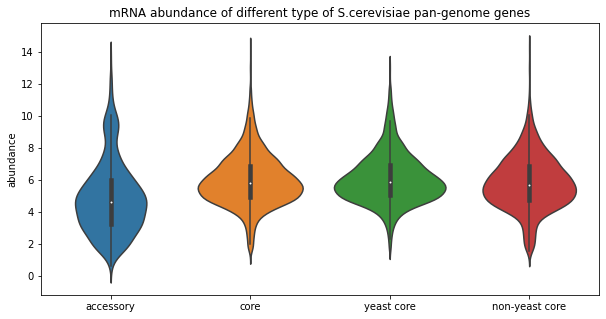

In [9]:
# plot violin plot to compare the mean transcriptional leval of different type of genes
fig,ax=plt.subplots(figsize=(10,5))
sns.violinplot(data=[df_sce_accessory_tpm_info["mean"],df_sce_core_tpm_info["mean"],df_sce_yeastcore_tpm_info["mean"],df_sce_core_nonyeastcore_tpm_info["mean"]],ax=ax)
# check the significance of difference between sce_noncore and sce_core
print('sce_noncore vs sce_core',stats.ttest_ind(df_sce_accessory_tpm_info["mean"],df_sce_core_tpm_info["mean"]))
# check the significance of difference between scecore_nonyeast7core and yeast7_core
print('scecore_nonyeast7core vs yeast7_core',stats.ttest_ind(df_sce_core_nonyeastcore_tpm_info["mean"],df_sce_yeastcore_tpm_info["mean"]))
# print the mean value of each type of genes
print('Mean TPM of accessory genes:',df_sce_accessory_tpm_info["mean"].mean())
print('Mean TPM of core genes:',df_sce_core_tpm_info["mean"].mean())
print('Mean TPM of yeast core genes:',df_sce_yeastcore_tpm_info["mean"].mean())
print('Mean TPM of sce core genes without yeast core genes:',df_sce_core_nonyeastcore_tpm_info["mean"].mean())
ax.set_xticklabels(["accessory","core","yeast core","non-yeast core"])
ax.set_ylabel("abundance")
ax.set_title("mRNA abundance of different type of S.cerevisiae pan-genome genes")
# plt.ylim(-400,600)
plt.show()

sce_noncore vs sce_core Ttest_indResult(statistic=44.45001626244285, pvalue=0.0)
scecore_nonyeast7core vs yeast7_core Ttest_indResult(statistic=6.796076935261618, pvalue=1.210745403541228e-11)
Mean cv of accessory genes: 0.20543061984307998
Mean cv of core genes: 0.09140228875790257
Mean cv of yeast core genes: 0.08630540412773652
Mean cv of sce core genes without yeast core genes: 0.09914006055161434


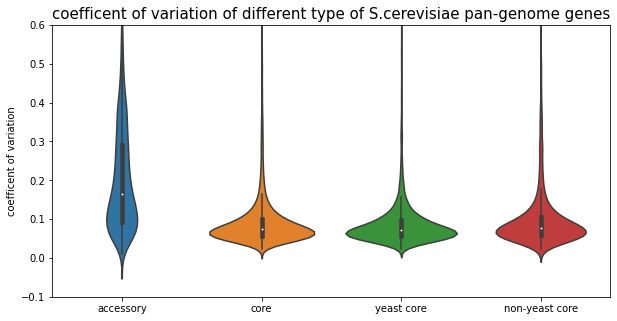

In [10]:
# plot violin plot to compare the cv of different type of genes
fig,ax=plt.subplots(figsize=(10,5))
sns.violinplot(data=[df_sce_accessory_tpm_info["cv"],df_sce_core_tpm_info["cv"],df_sce_yeastcore_tpm_info["cv"],df_sce_core_nonyeastcore_tpm_info["cv"]],ax=ax)
# check the significance of difference between sce_noncore and sce_core
print('sce_noncore vs sce_core',stats.ttest_ind(df_sce_accessory_tpm_info["cv"],df_sce_core_tpm_info["cv"]))
# check the significance of difference between scecore_nonyeast7core and yeast7_core
print('scecore_nonyeast7core vs yeast7_core',stats.ttest_ind(df_sce_core_nonyeastcore_tpm_info["cv"],df_sce_yeastcore_tpm_info["cv"]))
# print the mean value of each type of genes
print('Mean cv of accessory genes:',df_sce_accessory_tpm_info["cv"].mean())
print('Mean cv of core genes:',df_sce_core_tpm_info["cv"].mean())
print('Mean cv of yeast core genes:',df_sce_yeastcore_tpm_info["cv"].mean())
print('Mean cv of sce core genes without yeast core genes:',df_sce_core_nonyeastcore_tpm_info["cv"].mean())
ax.set_xticklabels(["accessory","core","yeast core","non-yeast core"])
ax.set_ylabel("coefficent of variation")
ax.set_title("coefficent of variation of different type of S.cerevisiae pan-genome genes",fontsize=15)
plt.ylim(-0.1,0.6)
plt.show()